In [187]:
from pydataset import data
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [188]:
# data('faithful', show_doc=True)

In [189]:
df = data('faithful')

In [190]:
df

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51
10,4.350,85


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [192]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


Text(8.71944444444445, 0.5, 'Eruption Time Mins')

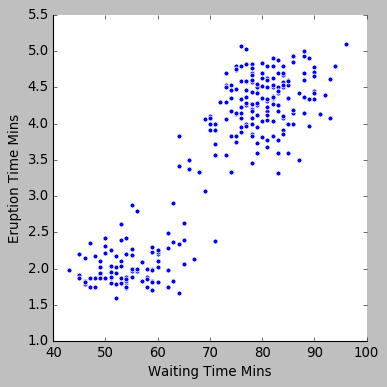

In [193]:
sns.relplot(x='waiting', y='eruptions', data=df)
plt.xlabel('Waiting Time Mins')
plt.ylabel('Eruption Time Mins')

### The longer the wait time the longer the eruption time.

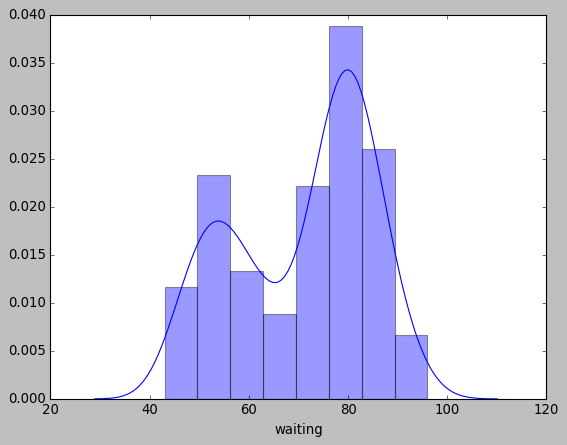

In [194]:
sns.distplot(df.waiting)

### Most of the waiting time is between 70-100 minutes.

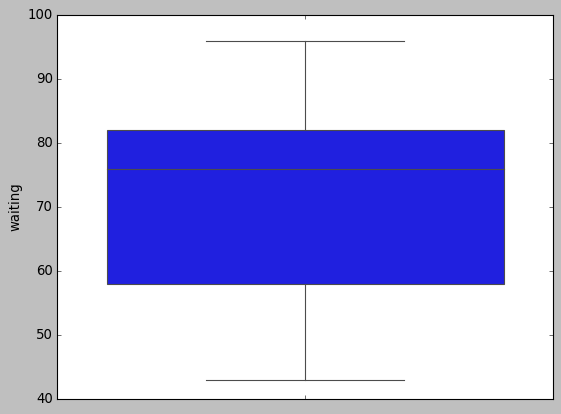

In [195]:
sns.boxplot(data=df, y=df.waiting)

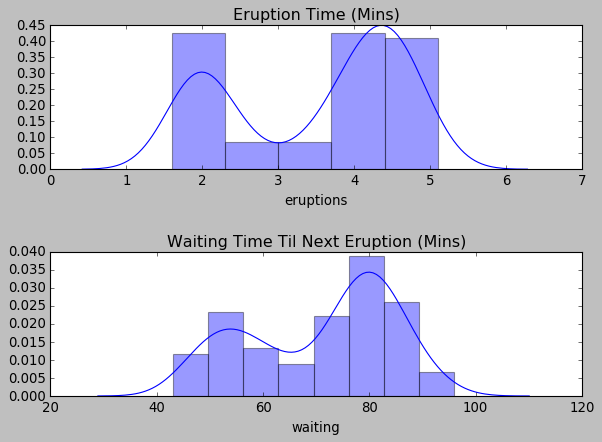

In [196]:
fig = plt.figure()
plt.subplot(211)
sns.distplot(df.eruptions)
plt.title('Eruption Time (Mins)')

plt.subplot(212)
sns.distplot(df.waiting)
plt.title('Waiting Time Til Next Eruption (Mins)')

fig.tight_layout(pad=2)


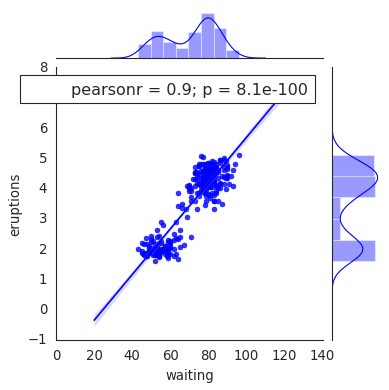

In [197]:
with sns.axes_style('white'):
    j = sns.jointplot("waiting", "eruptions", data=df, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

# Model

In [198]:
lm = LinearRegression()

In [199]:
lm.fit(df[['waiting']], df.eruptions)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
df['predicted'] = lm.predict(df[['waiting']])

In [201]:
df.head()

,eruptions,waiting,predicted
1,3.600,79,4.100592
2,1.800,54,2.209893
3,3.333,74,3.722452
4,2.283,62,2.814917
5,4.533,85,4.554360


In [202]:
lm_y_intercept = lm.intercept_
print(lm_y_intercept)

lm_coefficients = lm.coef_
print(lm_coefficients)

-1.8740159864107384
[0.07562795]


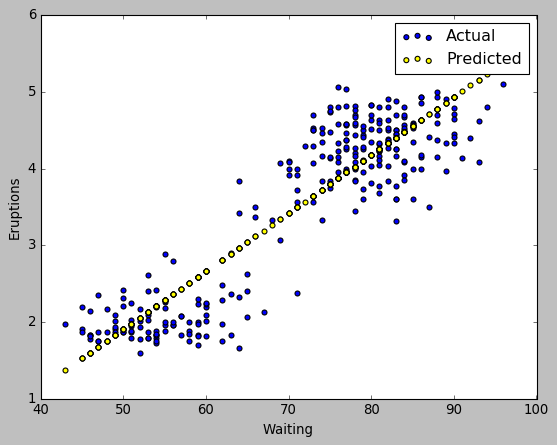

In [203]:
plt.scatter(df.waiting, df.eruptions, label='Actual')
plt.scatter(df.waiting, df.predicted, label='Predicted', c='yellow')
plt.xlabel('Waiting')
plt.ylabel('Eruptions')
plt.legend()

In [204]:
pearsonr(df.waiting, df.eruptions)


(0.9008111683218131, 8.129958506616628e-100)

In [205]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): -1.90
    coefficient (m): 0.08



Text(50, 5.5, 'RMSE: 0.24')

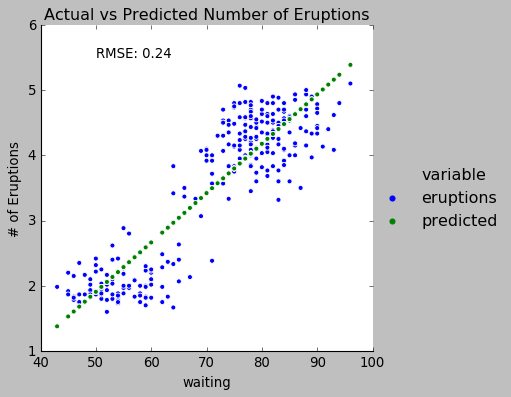

In [206]:
(pd.melt(df, id_vars='waiting')
 .pipe((sns.relplot, 'data'), x='waiting', y='value', hue='variable'))
rmse = mean_squared_error(df.eruptions, df.predicted)

plt.ylabel('# of Eruptions')
plt.title('Actual vs Predicted Number of Eruptions')
plt.yticks(range(1, 7))
plt.text(50, 5.5, 'RMSE: {:.2}'.format(rmse))